# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from agents.dqn_agent import DQNAgent
from agents.utils import Trainer
import torch
import matplotlib.pyplot as plt

In [2]:
env = UnityEnvironment(file_name="C:\\Users\\saini\\Work\\learning\\deep-reinforcement-learning\\p1_navigation\\Banana_Windows_x86_64\\Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [4]:
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
agent = DQNAgent(state_size, action_size, 0.98, 1e-3, 760, device, 0.2)
trainer = Trainer(agent, 16, 4, 4096, device)

In [5]:
def play_episode(env, agent, max_steps=500, trainer=None):
    env_info = env.reset(train_mode=True if trainer else False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    steps = 0
    while True:
        action = int(agent.compute_action(state))      # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        steps += 1

        if trainer:
            trainer.step(state, action, reward, next_state, done)

        state = next_state                             # roll over the state to next time step
        if done or steps>=max_steps:                    # exit loop if episode finished
            break
    return score

In [6]:
max_episodes = 300
scores = []
for i in range(max_episodes):
    score = play_episode(env, agent, trainer=trainer)
    scores.append(score)
    
    avg_score = np.mean(scores[-100:])
    if avg_score > 13:
        print("Solved at episode {}".format(i))
    elif (i+1)%100 == 0:
        print("Episode :{:5d},\tAvg score : {:3.2f}".format(i, avg_score))

Episode :   99,	Avg score : 0.15
Episode :  199,	Avg score : 0.59
Episode :  299,	Avg score : 8.44


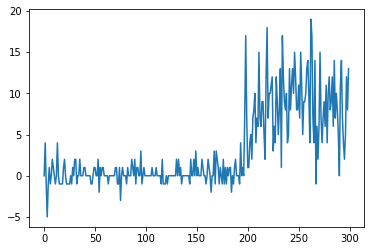

In [7]:
plt.plot(scores)

In [8]:
play_episode(env, agent)

12.0

In [9]:
env.close()